In [ ]:
import pandas as pd

data = pd.read_excel('/content/Feature_Simulation.xlsx')
data.dropna(inplace=True)
data.dropna(inplace=True, axis=1, how='all')

In [ ]:
# Summarize event occurrence
event_columns = [
    'straight', 'roundabout_entry', 'roundabout_exit', 'zebra_crossing',
    'left_turn', 'u_turn', 'turn_after_dummy', 'car', 'pedestrian',
    'traffic_light', 'narrow_road', 'dummy', 'bend'
]

# Check if the specified event columns exist in the dataframe, adjust if necessary
event_columns = [col for col in event_columns if col in data.columns]

# Summarize the occurrence of each event
event_summary = data[event_columns].sum().sort_values(ascending=False)

event_summary


zebra_crossing      554
straight            387
left_turn           213
roundabout_exit     204
roundabout_entry    191
traffic_light       102
u_turn               63
car                  59
pedestrian           57
dummy                14
narrow_road          11
bend                  0
dtype: int64

In [ ]:
# Summarize violations
violation_columns = [
    'violation_no', 'violation_roadside_invasion', 'violation_give_the_way', 'violation_heavy_braking', 'violation_roadside_exit'
]

# Summarize the occurrence of each violation
violation_summary = data[violation_columns].sum().sort_values(ascending=False)

# Perform correlation analysis between events and violations
correlation_matrix = data[event_columns + violation_columns].corr()

# Extract correlations related to violations
violation_correlations = correlation_matrix[violation_columns].loc[event_columns]

violation_summary, violation_correlations


(violation_no                   814
 violation_roadside_invasion    140
 violation_roadside_exit         49
 violation_give_the_way          15
 violation_heavy_braking          1
 dtype: int64,
                   violation_no  violation_roadside_invasion  \
 straight              0.082292                    -0.109400   
 roundabout_entry      0.057846                    -0.065128   
 roundabout_exit      -0.025105                     0.066557   
 zebra_crossing        0.014568                     0.000292   
 left_turn            -0.128639                     0.127052   
 u_turn                0.004924                    -0.045864   
 car                  -0.002949                    -0.040404   
 pedestrian           -0.018286                     0.012188   
 traffic_light        -0.055358                     0.025235   
 narrow_road           0.000025                     0.012502   
 dummy                 0.012093                    -0.023800   
 bend                       NaN      

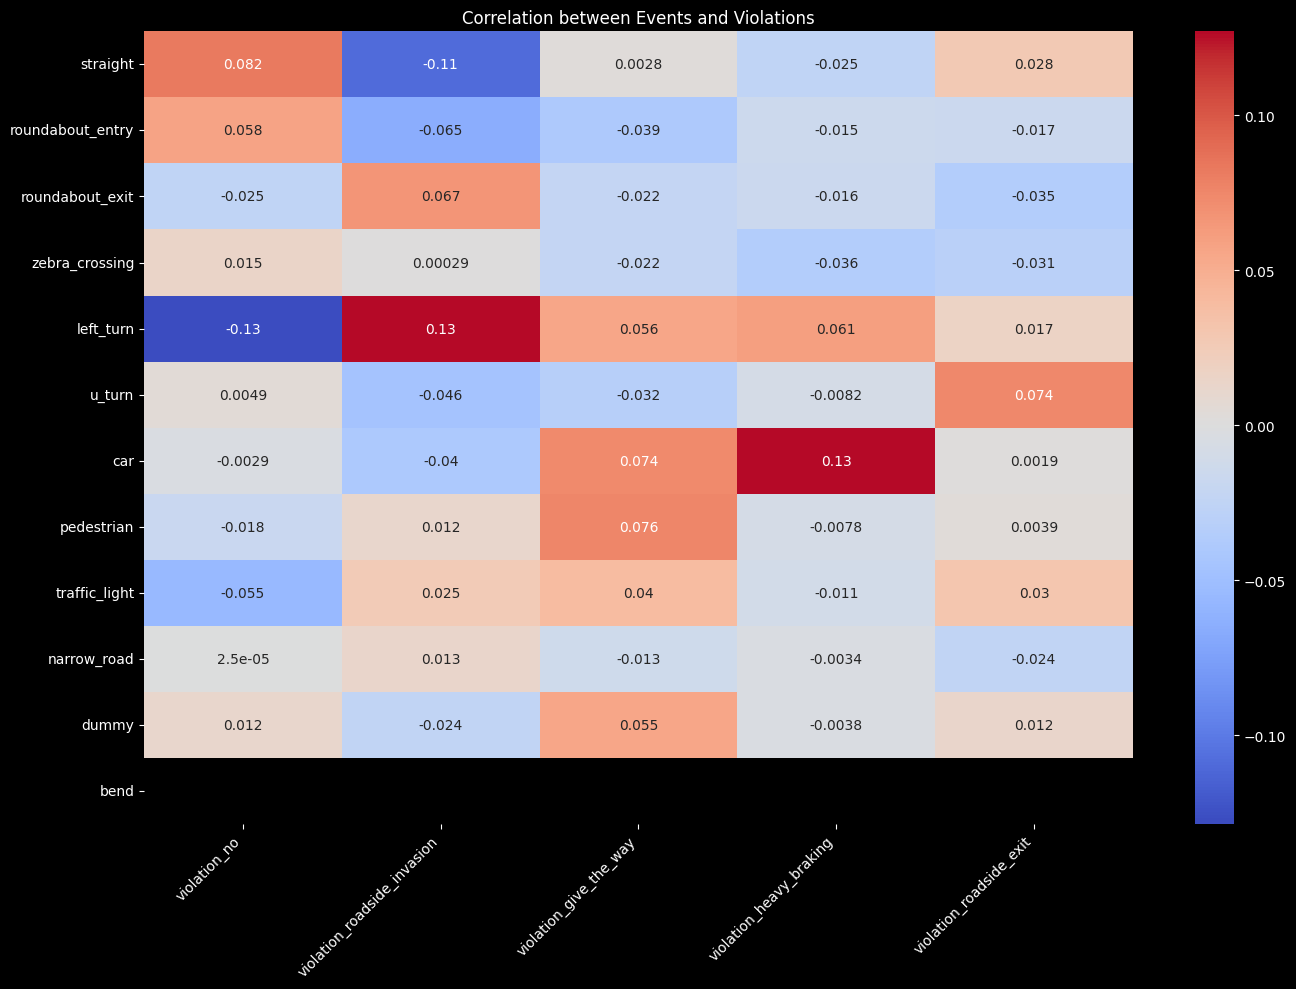

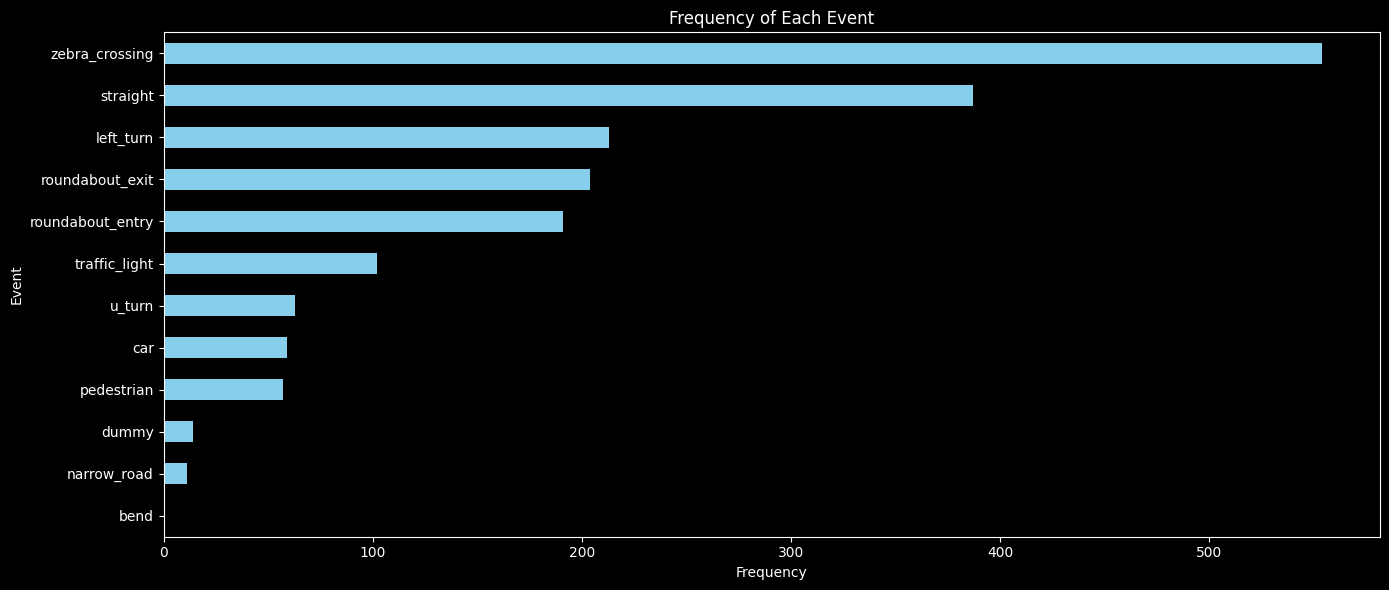

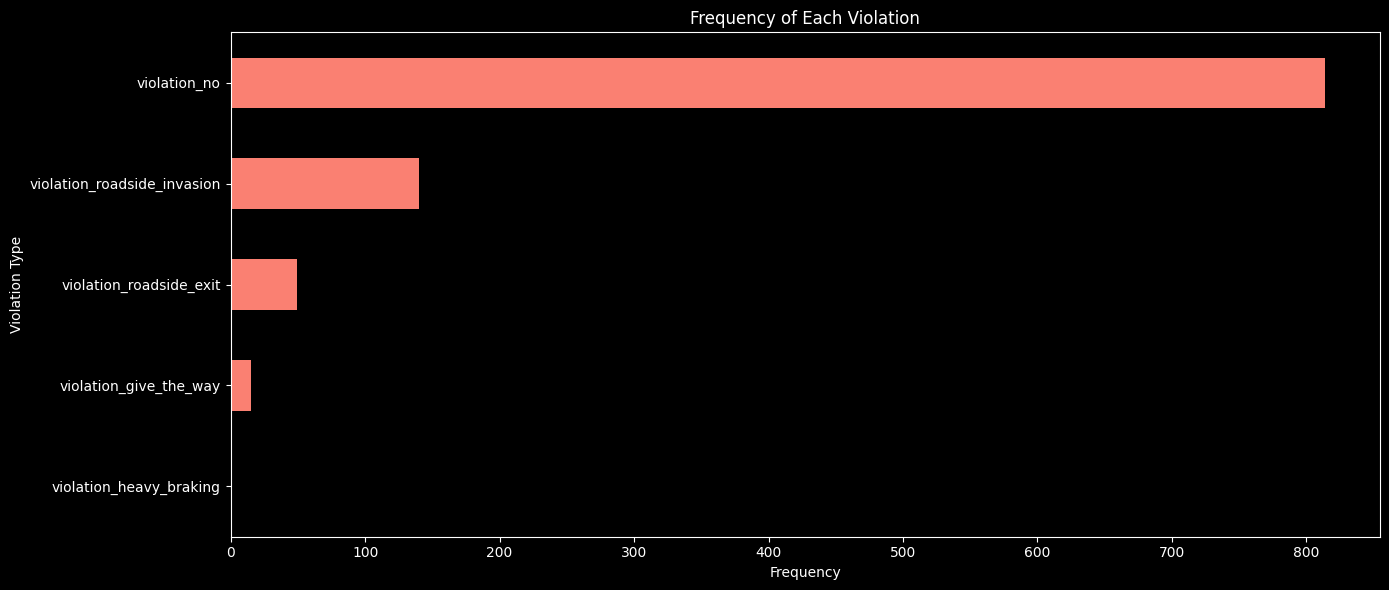

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of correlations between events and violations
plt.style.use('dark_background')
plt.figure(figsize=(14, 10))
sns.heatmap(violation_correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Events and Violations')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Bar chart for event occurrences
plt.figure(figsize=(14, 6))
event_summary.sort_values().plot(kind='barh', color='skyblue')
plt.title('Frequency of Each Event')
plt.xlabel('Frequency')
plt.ylabel('Event')
plt.tight_layout()
plt.show()

# Bar chart for violation occurrences
plt.figure(figsize=(14, 6))
violation_summary.sort_values().plot(kind='barh', color='salmon')
plt.title('Frequency of Each Violation')
plt.xlabel('Frequency')
plt.ylabel('Violation Type')
plt.tight_layout()
plt.show()

# Example scatter plot for a specific correlation (if data allows)
# We'll choose pedestrian events and "give the way" violations as an example
# Note: Actual scatter plot might require data transformation or specific data points selection
# Here we demonstrate the setup; actual plotting would depend on available data points

# Since the direct relationship between single events and violations isn't directly plottable without specific data points,
# this step is more illustrative of the approach rather than executable in this context.
# For actionable scatter plots, one would need individual records of events and associated violations, which might require
# aggregating or restructuring the data differently.


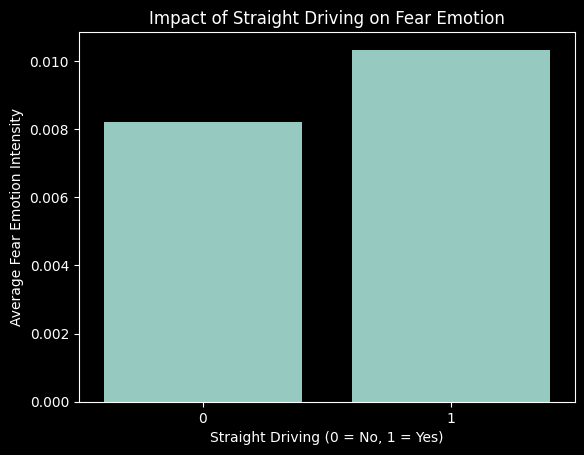

In [ ]:
emotion_impact = data.groupby('straight')['emotion_fear'].mean().reset_index()

# Visualization
sns.barplot(x='straight', y='emotion_fear', data=emotion_impact)
plt.title('Impact of Straight Driving on Fear Emotion')
plt.xlabel('Straight Driving (0 = No, 1 = Yes)')
plt.ylabel('Average Fear Emotion Intensity')
plt.show()

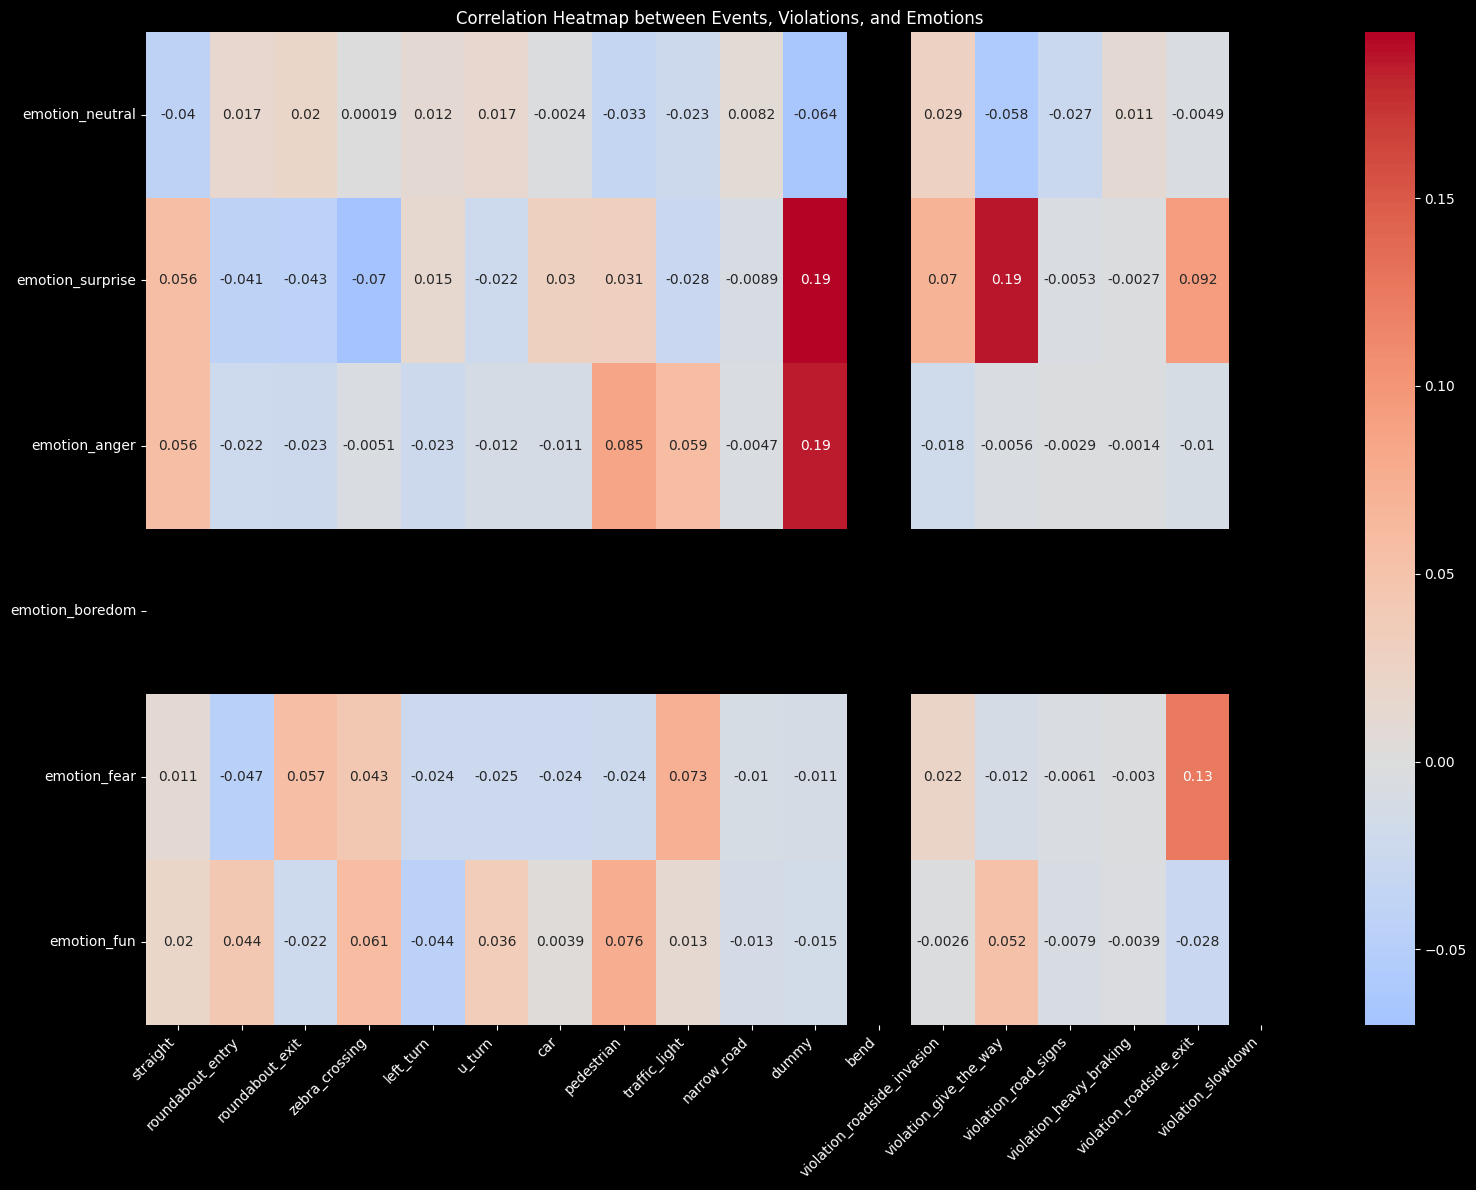

In [ ]:
df = data

# Assuming 'df' is the DataFrame containing your data
# Select relevant columns for events, violations, and emotions
event_columns = [
    'straight', 'roundabout_entry', 'roundabout_exit', 'zebra_crossing',
    'left_turn', 'u_turn', 'car', 'pedestrian',
    'traffic_light', 'narrow_road', 'dummy', 'bend'
]
violation_columns = [
    'violation_roadside_invasion', 'violation_give_the_way',
    'violation_road_signs', 'violation_heavy_braking', 'violation_roadside_exit',
    'violation_slowdown'
]
emotion_columns = [
    'emotion_neutral', 'emotion_surprise', 'emotion_anger',
    'emotion_boredom', 'emotion_fear', 'emotion_fun'
]

# Combine all selected columns
all_columns = event_columns + violation_columns + emotion_columns

# Calculate the correlation matrix for these columns
correlation_matrix = df[all_columns].corr()
violation_correlations = correlation_matrix[event_columns + violation_columns].loc[emotion_columns]

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(violation_correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap between Events, Violations, and Emotions')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


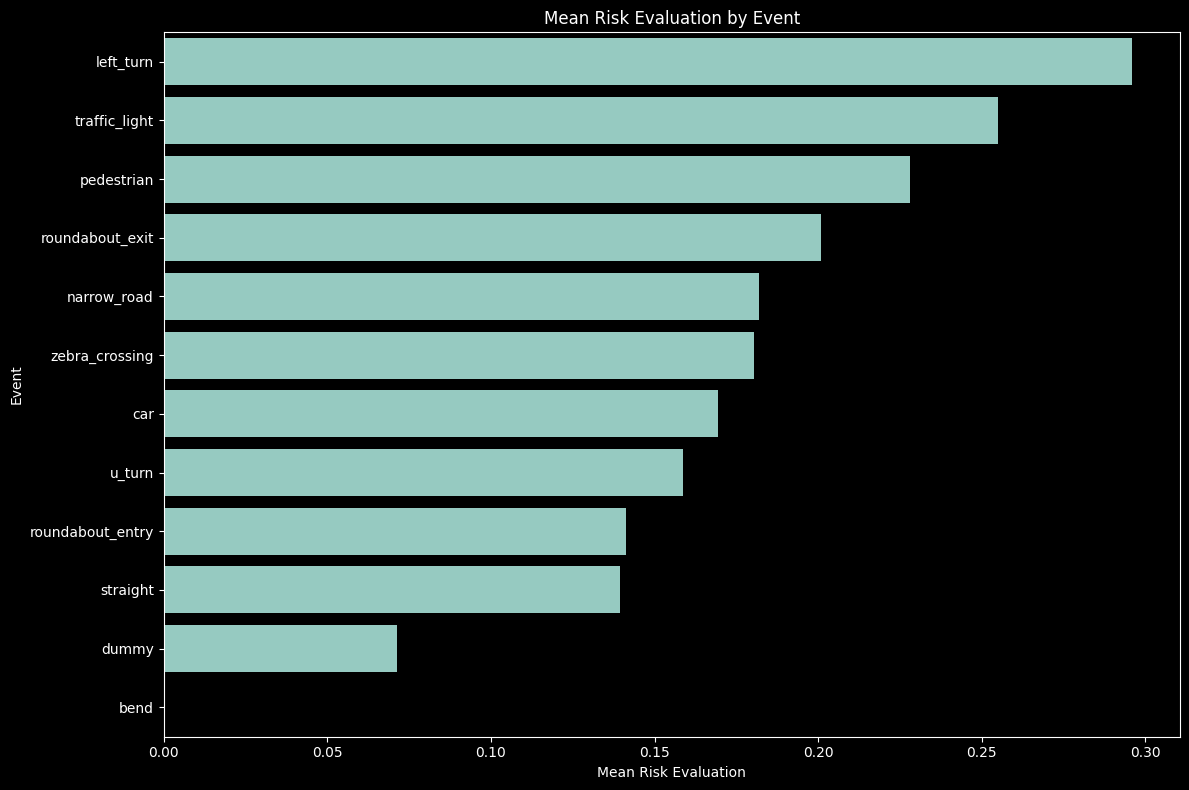

In [ ]:
mean_risk_per_event = {}

for event in event_columns:
    # Calculate mean risk for rows where the event is marked (i.e., event column value > 0)
    mean_risk = df[df[event] > 0]['risk_evaluation'].mean()
    mean_risk_per_event[event] = mean_risk

# Convert to DataFrame for easier handling
mean_risk_df = pd.DataFrame(list(mean_risk_per_event.items()), columns=['Event', 'MeanRiskEvaluation'])

# Sort the DataFrame based on MeanRiskEvaluation for better visualization
mean_risk_df = mean_risk_df.sort_values(by='MeanRiskEvaluation', ascending=False)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='MeanRiskEvaluation', y='Event', data=mean_risk_df)
plt.title('Mean Risk Evaluation by Event')
plt.xlabel('Mean Risk Evaluation')
plt.ylabel('Event')
plt.tight_layout()
plt.show()

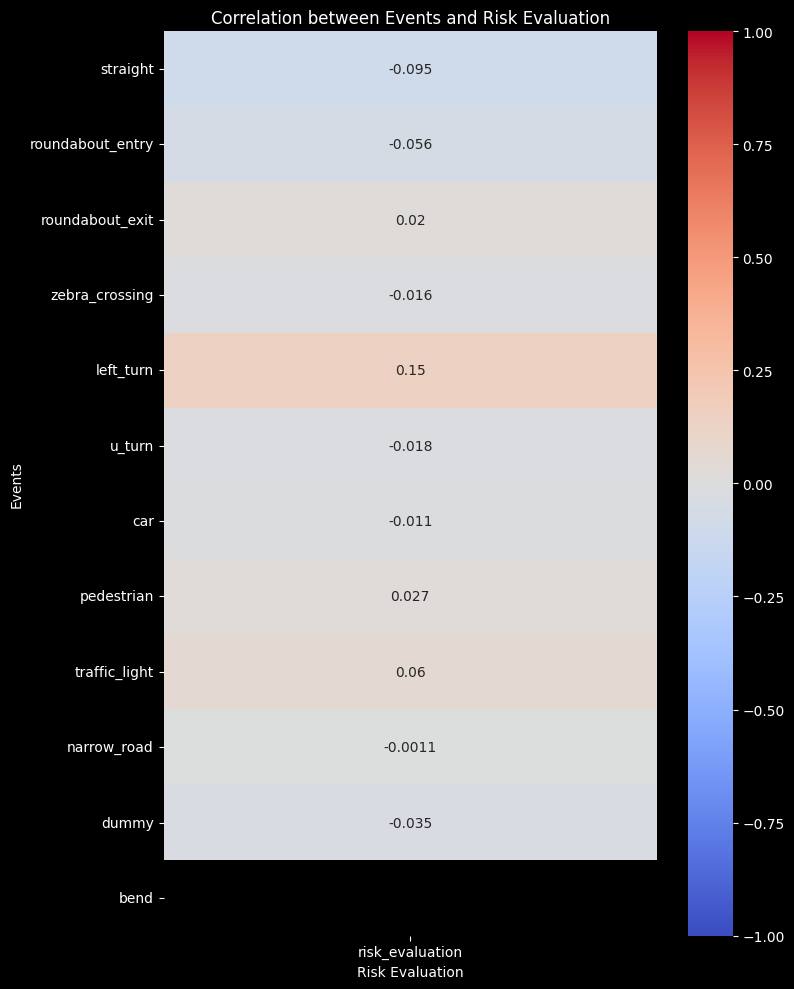

In [ ]:
# Ensure risk_evaluation is treated as numerical if it's not already
df['risk_evaluation'] = pd.to_numeric(df['risk_evaluation'], errors='coerce')

# Calculate correlation matrix between risk_evaluation and events
correlation_matrix = df[['risk_evaluation'] + event_columns].corr()

# Filter the correlation matrix to only include correlations between events and risk_evaluation
correlation_with_risk = correlation_matrix.loc[event_columns, ['risk_evaluation']]

# Visualize the correlation with a heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_risk, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Events and Risk Evaluation')
plt.xlabel('Risk Evaluation')
plt.ylabel('Events')
plt.tight_layout()
plt.show()